# 色々な画像処理を試してみる

## OpenCV応用例：A-KAZEを使って特徴量マッチング

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
img1 = cv2.imread("test_clip.jpg")
img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("test.jpg")
img2_g = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [41]:
detector = cv2.AKAZE_create()

In [42]:
# kp: KeyPointのリスト
# des: numpy.array
kp1, des1 = detector.detectAndCompute(img1_g, None)
kp2, des2 = detector.detectAndCompute(img2_g, None)

In [43]:
# BFMather (Brute-force matcher)総当り
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
# matches: DMatch構造体のリスト
# DMatch: distance, imgIdx, queryIdx(kp1), trainIdx(kp2)

# 距離を使ってソートする
matches = sorted(matches, key=lambda x:x.distance)

In [47]:
# 対応点を抽出する
num_pts = 20
img1_pts = [list(map(int, kp1[m.queryIdx].pt)) for m in matches]
img2_pts = [list(map(int, kp2[m.trainIdx].pt)) for m in matches]

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:num_pts], None, flags=2)

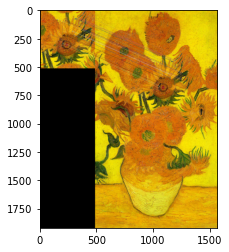

In [49]:
img3_rgb = img3[:,:,::-1]
plt.imshow(img3_rgb)

In [1]:
cv2.imwrite("test_feature_matching.jpg", img3)

NameError: name 'cv2' is not defined

### なにか、OpenCVを使って画像処理を書いてください．コマンドでも、Jupyterでどちらでも構いません．

In [ ]:
# ここに回答を書いて下さい
